## Import Package

In [1]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from datetime import datetime

## Import Data

In [2]:
creditcard='/kaggle/input/analyzing-credit-card-spending-habits-in-india/Credit card transactions - India - Simple.csv'
df = pd.read_csv(creditcard,index_col="index")
df.head()

,City,Date,Card Type,Exp Type,Gender,Amount
index,,,,,,
0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574


#### Load information about data using df.info()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26052 entries, 0 to 26051
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   City       26052 non-null  object
 1   Date       26052 non-null  object
 2   Card Type  26052 non-null  object
 3   Exp Type   26052 non-null  object
 4   Gender     26052 non-null  object
 5   Amount     26052 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 1.4+ MB


df contains 26052 data and there's no missing value so cleaning is not necessary, it has 2 columns with integer and 5 columns with object. The date is not read as date so the format needs to change.

In [4]:
from datetime import datetime
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26052 entries, 0 to 26051
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   City       26052 non-null  object        
 1   Date       26052 non-null  datetime64[ns]
 2   Card Type  26052 non-null  object        
 3   Exp Type   26052 non-null  object        
 4   Gender     26052 non-null  object        
 5   Amount     26052 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 1.4+ MB


#### Find out how many unique values are in each column with df.nunique

In [5]:
df.nunique()

City           986
Date           600
Card Type        4
Exp Type         6
Gender           2
Amount       24972
dtype: int64

There are 986 cities, 600 dates, 4 types of cards, 6 types of exp and 2 genders.

In [6]:
df['date'] = df['Date'].dt.strftime('%d')
df['Year'] = df['Date'].dt.strftime('%Y')
df['Month'] = df['Date'].dt.strftime('%B')
df['Month_Year'] = df['Date'].dt.strftime('%B-%Y')
df

,City,Date,Card Type,Exp Type,Gender,Amount,date,Year,Month,Month_Year
index,,,,,,,,,,
0,"Delhi, India",2014-10-29,Gold,Bills,F,82475,29,2014,October,October-2014
1,"Greater Mumbai, India",2014-08-22,Platinum,Bills,F,32555,22,2014,August,August-2014
2,"Bengaluru, India",2014-08-27,Silver,Bills,F,101738,27,2014,August,August-2014
3,"Greater Mumbai, India",2014-04-12,Signature,Bills,F,123424,12,2014,April,April-2014
4,"Bengaluru, India",2015-05-05,Gold,Bills,F,171574,05,2015,May,May-2015
...,...,...,...,...,...,...,...,...,...,...
26047,"Kolkata, India",2014-06-22,Silver,Travel,F,128191,22,2014,June,June-2014
26048,"Pune, India",2014-08-03,Signature,Travel,M,246316,03,2014,August,August-2014
26049,"Hyderabad, India",2015-01-16,Silver,Travel,M,265019,16,2015,January,January-2015


In [7]:
df[['City Name', 'Country']] = df.City.str.split(",", expand = True)
df

,City,Date,Card Type,Exp Type,Gender,Amount,date,Year,Month,Month_Year,City Name,Country
index,,,,,,,,,,,,
0,"Delhi, India",2014-10-29,Gold,Bills,F,82475,29,2014,October,October-2014,Delhi,India
1,"Greater Mumbai, India",2014-08-22,Platinum,Bills,F,32555,22,2014,August,August-2014,Greater Mumbai,India
2,"Bengaluru, India",2014-08-27,Silver,Bills,F,101738,27,2014,August,August-2014,Bengaluru,India
3,"Greater Mumbai, India",2014-04-12,Signature,Bills,F,123424,12,2014,April,April-2014,Greater Mumbai,India
4,"Bengaluru, India",2015-05-05,Gold,Bills,F,171574,05,2015,May,May-2015,Bengaluru,India
...,...,...,...,...,...,...,...,...,...,...,...,...
26047,"Kolkata, India",2014-06-22,Silver,Travel,F,128191,22,2014,June,June-2014,Kolkata,India
26048,"Pune, India",2014-08-03,Signature,Travel,M,246316,03,2014,August,August-2014,Pune,India
26049,"Hyderabad, India",2015-01-16,Silver,Travel,M,265019,16,2015,January,January-2015,Hyderabad,India


#### Describing df with df.describe() to see descriptive statistics (summarize the central tendency, dispersion and shape of data)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Amount,26052.0,156411.537425,103063.254287,1005.0,77120.25,153106.5,228050.0,998077.0


## Data Visualization

In [9]:
px.pie(df.sort_values(by='Amount',ascending=1), values='Amount', names='Card Type', title='Proportion Card Types',
    color_discrete_sequence=["grey", "green", "lightgrey", "gold"]).show()

The proportion of using card types is almost equal, but silver card users are leads with 26.2%

In [10]:
px.pie(df.sort_values(by='Amount',ascending=1), values='Amount', names='Exp Type', title='Proportion of Exp Types').show()

People in India tend to spend on Bills

In [11]:
df.groupby(['Exp Type','Card Type']).sum().unstack(level=-1).T

Exp Type              Bills  Entertainment       Food       Fuel    Grocery  \
       Card Type                                                              
Amount Gold       225533948      173468463  193756454  194343922  166246853   
       Platinum   222027597      185608738  210318810  194069361  171360820   
       Signature  226115472      178648981  206247814  187797487  186732315   
       Silver     233395456      188711354  214400931  212925051  193867935   

Exp Type            Travel  
       Card Type            
Amount Gold       31189896  
       Platinum   24253693  
       Signature  27499036  
       Silver     26312986

In [12]:
px.histogram(df, y='Exp Type', x='Amount', color='Card Type',text_auto=True,title= 'Histogram of Card Type, Exp Type and Amount').update_layout(yaxis={'categoryorder':'total ascending'})

Text(0.5, 42.0, 'Card Type')

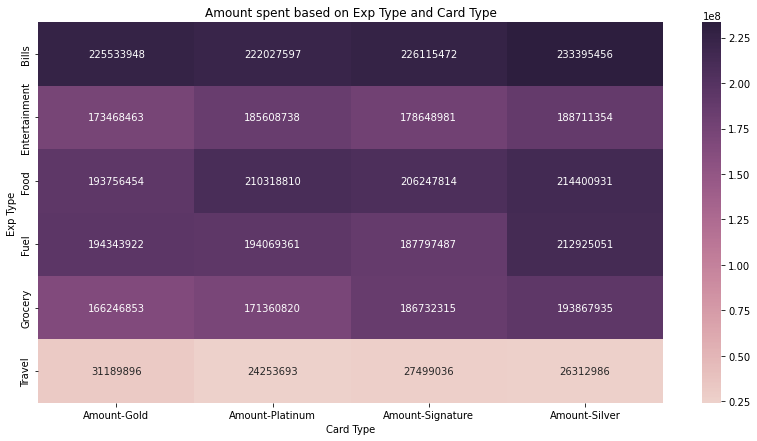

In [13]:
a= df.groupby(['Exp Type','Card Type']).sum().unstack(level=-1)
plt.figure(figsize=(14,7))
plt.title("Amount spent based on Exp Type and Card Type")
sns.heatmap(data=a, annot=True,cmap=sns.cubehelix_palette(as_cmap=True),fmt=".0f")
plt.xlabel("Card Type") # Your code here

People with Silver cards spend more than the other card, most people who use Silver Card pays the Bills.


In [14]:
df.groupby(['City']).sum().sort_values(by='Amount', ascending=0).head(10)

,Amount
City,
"Greater Mumbai, India",576751476
"Bengaluru, India",572326739
"Ahmedabad, India",567794310
"Delhi, India",556929212
"Kolkata, India",115466943
"Lucknow, India",115334476
"Chennai, India",114730600
"Hyderabad, India",114493477
"Surat, India",114486151


## Is there any trend in credit card spending over time?

<AxesSubplot:xlabel='Month_Year', ylabel='Amount'>

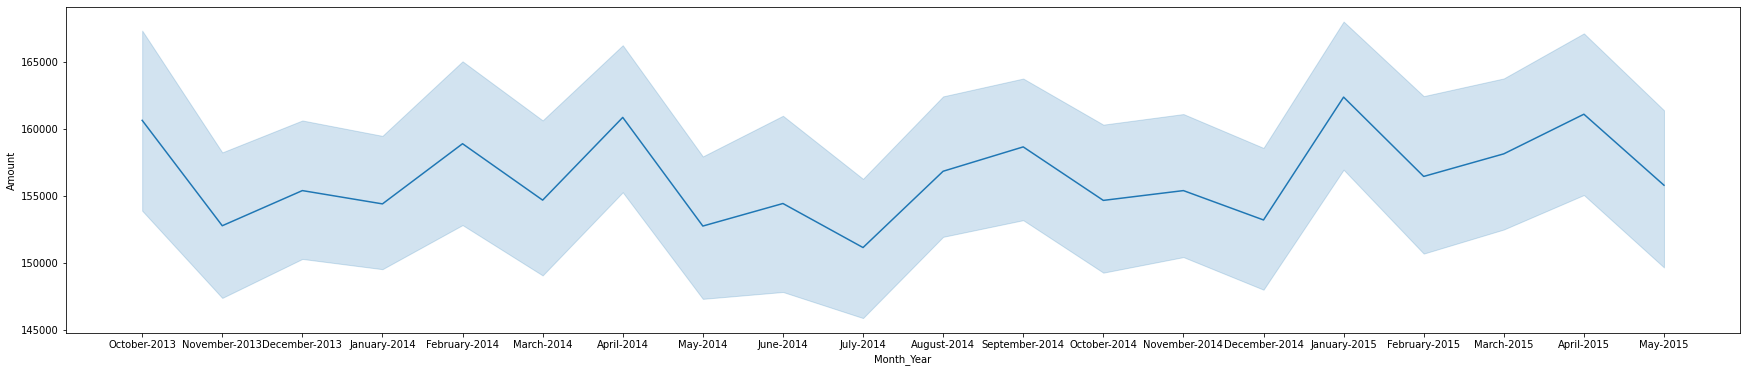

In [15]:
plt.figure(figsize=(30,6))
sns.lineplot(data=df.sort_values(by='Date'), x='Month_Year', y='Amount')

## Purchase spend by gender

In [16]:
px.pie(df.sort_values(by='Amount',ascending=1), values='Amount', names='Gender', title='Proportion of Gender', color_discrete_sequence=["pink", "blue"]).show()

Females have higher credit card spending than males.

<AxesSubplot:xlabel='Month_Year', ylabel='Amount'>

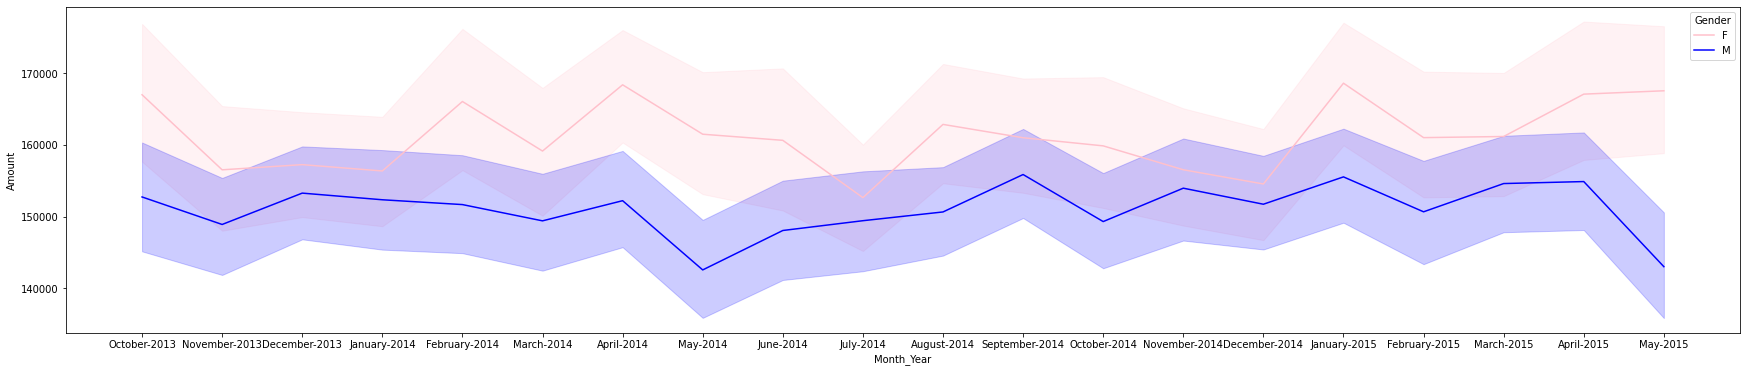

In [17]:
plt.figure(figsize=(30,6))
sns.lineplot(data=df.sort_values(by='Date'), x='Month_Year', y='Amount',hue='Gender',palette=['pink','b'])

It can be seen that Females in India from 2013 to 2015 tend to spend a higher amount than Males.

In [18]:
px.histogram(df, x='Exp Type', y='Amount',color='Gender',barmode='group', text_auto=True,color_discrete_map = {'F':'pink','M':'blue'} ).update_layout(xaxis={'categoryorder':'total descending'})

Females lead in bills, food, travel and grocery categories meanwhile males lead in entertainment and fuel.

## Cities with the most Spend

In [19]:
dfg = df.groupby(['City']).sum().sort_values(by='Amount', ascending = False).head(10).reset_index()
fig = px.histogram(dfg, x='City', y = 'Amount', text_auto=True).update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

As we can see there's 4 cities that stands out with highest spend amount, Greater Mumbai, Bengaluru, Ahmedabad and Delhi has over 555M spent. We will focus in this 4 cities

In [20]:
df1=df[df['City']=='Greater Mumbai, India']
df2=df[df['City']=='Ahmedabad, India']
df3=df[df['City']=='Bengaluru, India']
df4=df[df['City']=='Delhi, India']
dftop4=pd.concat([df1, df2, df3, df4], ignore_index=True)
dftop4

,City,Date,Card Type,Exp Type,Gender,Amount,date,Year,Month,Month_Year,City Name,Country
0,"Greater Mumbai, India",2014-08-22,Platinum,Bills,F,32555,22,2014,August,August-2014,Greater Mumbai,India
1,"Greater Mumbai, India",2014-04-12,Signature,Bills,F,123424,12,2014,April,April-2014,Greater Mumbai,India
2,"Greater Mumbai, India",2014-06-26,Platinum,Bills,F,150980,26,2014,June,June-2014,Greater Mumbai,India
3,"Greater Mumbai, India",2013-12-07,Signature,Bills,F,278036,07,2013,December,December-2013,Greater Mumbai,India
4,"Greater Mumbai, India",2014-08-07,Gold,Bills,F,19226,07,2014,August,August-2014,Greater Mumbai,India
...,...,...,...,...,...,...,...,...,...,...,...,...
14013,"Delhi, India",2014-02-04,Gold,Food,M,247574,04,2014,February,February-2014,Delhi,India
14014,"Delhi, India",2015-02-10,Platinum,Fuel,M,168249,10,2015,February,February-2015,Delhi,India
14015,"Delhi, India",2014-02-05,Gold,Grocery,F,292011,05,2014,February,February-2014,Delhi,India
14016,"Delhi, India",2015-01-11,Signature,Food,F,80422,11,2015,January,January-2015,Delhi,India


<AxesSubplot:xlabel='Month_Year', ylabel='Amount'>

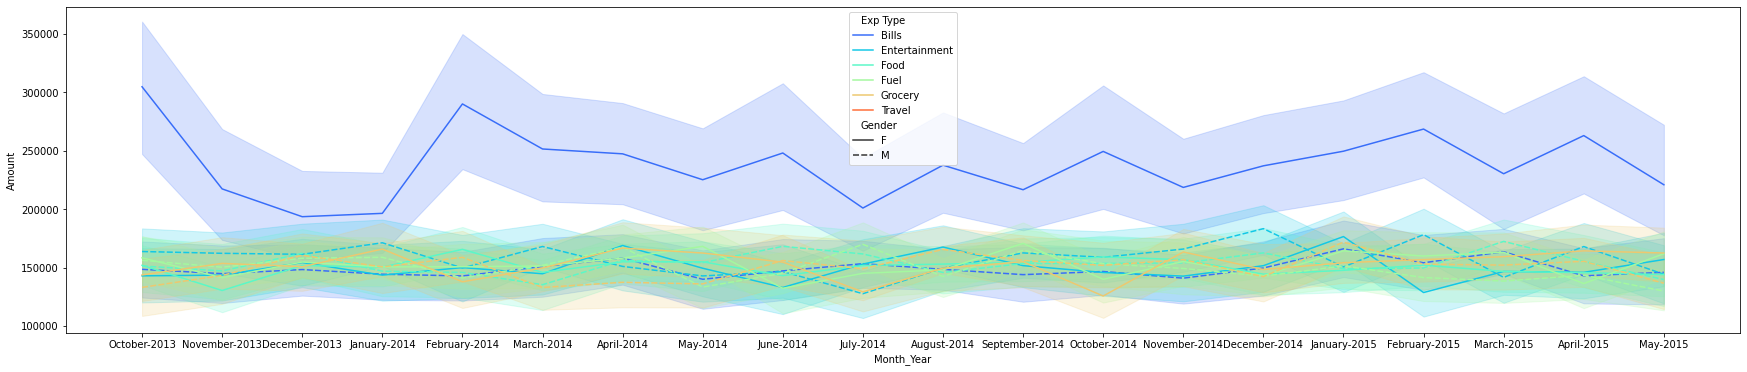

In [21]:
plt.figure(figsize=(30,6))
sns.lineplot(data=dftop4.sort_values(by='Date'), x='Month_Year', y='Amount',style='Gender',hue='Exp Type', palette="rainbow", hue_order=['Bills','Entertainment','Food','Fuel','Grocery','Travel'])

Massive spend amount occuring at October 2013 and February 2014 by female to pay bills in Greater Mumbai, Ahmedabad, Delhi, and Bengaluru.

### Credit card spending overtime based on exp type

<AxesSubplot:xlabel='Month_Year', ylabel='Amount'>

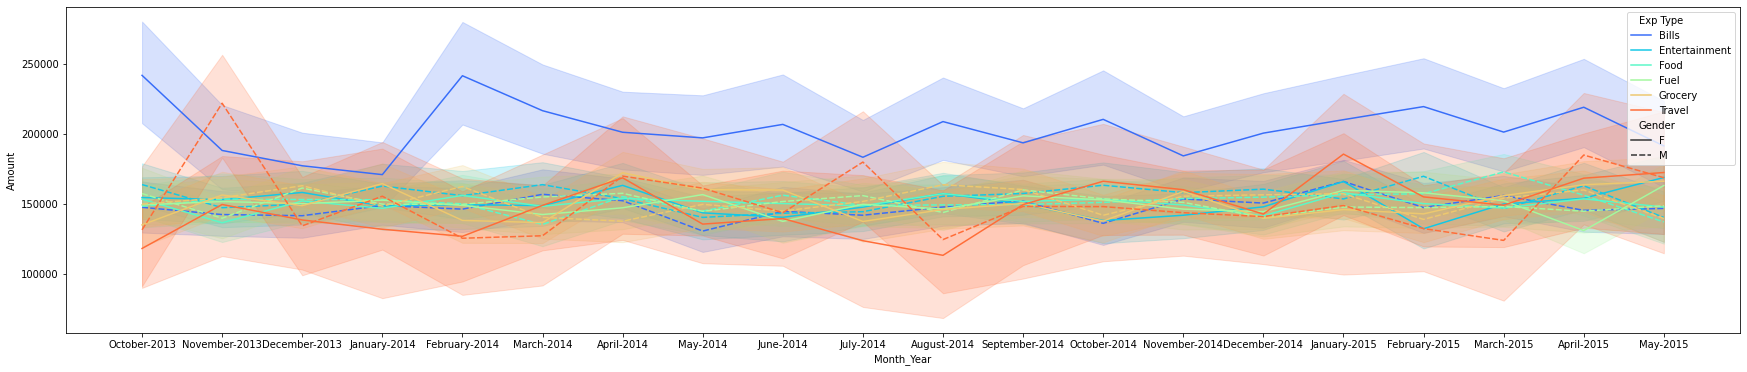

In [22]:
plt.figure(figsize=(30,6))
sns.lineplot(data=df.sort_values(by='Date'), x='Month_Year', y='Amount',style='Gender',hue='Exp Type', palette="rainbow", hue_order=['Bills','Entertainment','Food','Fuel','Grocery','Travel'])

Apparently, males spent a high amount in November 2013 on Travel.

<AxesSubplot:xlabel='Month_Year', ylabel='Amount'>

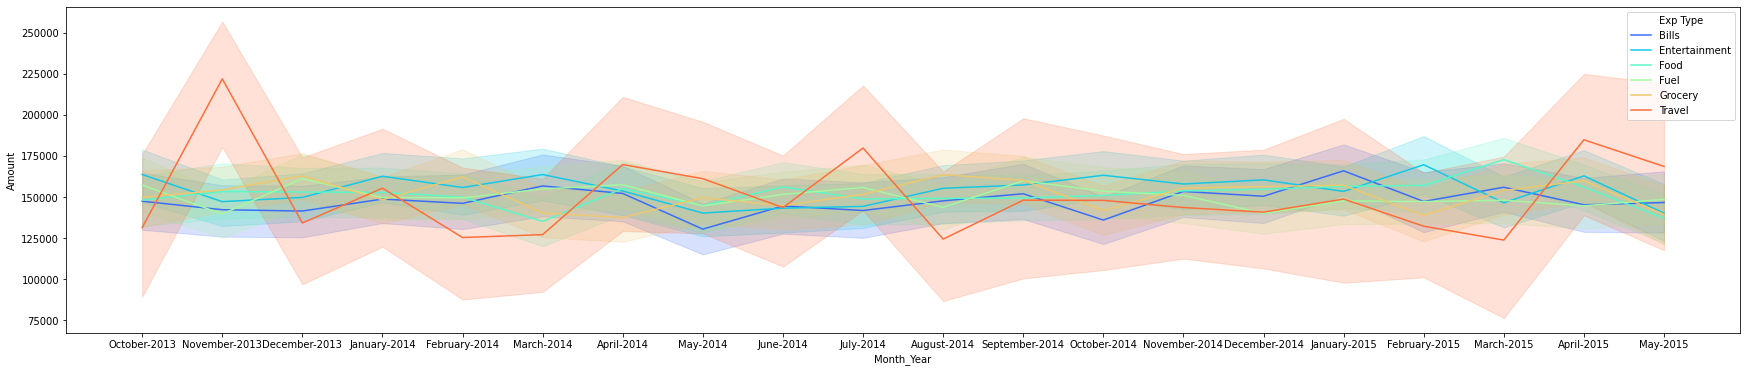

In [23]:
plt.figure(figsize=(30,6))
sns.lineplot(data=df[df['Gender']=='M'].sort_values(by='Date'), x='Month_Year', y='Amount',hue='Exp Type',palette="rainbow", hue_order=['Bills','Entertainment','Food','Fuel','Grocery','Travel'])

Travel stands out in males transaction

<AxesSubplot:xlabel='Month_Year', ylabel='Amount'>

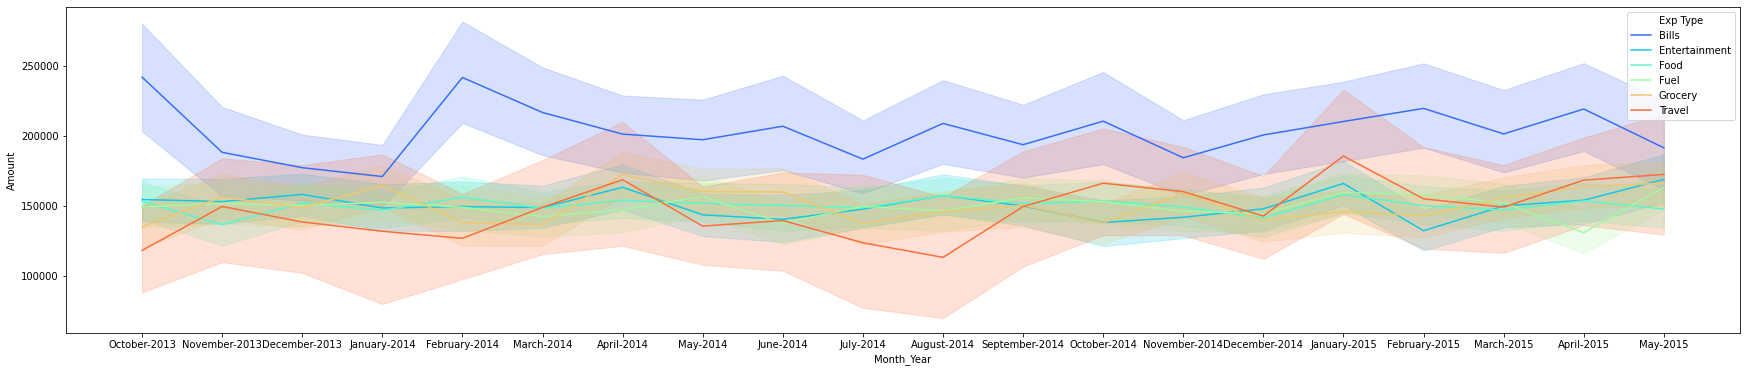

In [24]:
plt.figure(figsize=(30,6))
sns.lineplot(data=df[df['Gender']=='F'].sort_values(by='Date'), x='Month_Year', y='Amount',hue='Exp Type',palette="rainbow", hue_order=['Bills','Entertainment','Food','Fuel','Grocery','Travel'])

Travel also stands out in female after bills

### Actionable plans:
* Males have an interest in making travel transactions in February 2014, we need to do a collaboration with travel agents and give them discounts for travel transactions or an event with trip vouchers as a door prize.